In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
dftrainx = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
dftrainy = pd.read_csv('./Training Data/Diabetes_YTrain.csv')
dftestx = pd.read_csv('./Testing Data/Diabetes_XTest.csv')

In [5]:
dftrainx.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
x = dftrainx.values
y = dftrainy.values.reshape((-1,))
x_test = dftestx.values

In [21]:
split = int(0.8*x.shape[0])

In [23]:
x_train = x[:split]
x_valid = x[split:]
y_train = y[:split]
y_valid = y[split:]

In [24]:
x_train.shape, x_valid.shape,y_train.shape,y_valid.shape

((460, 8), (116, 8), (460,), (116,))

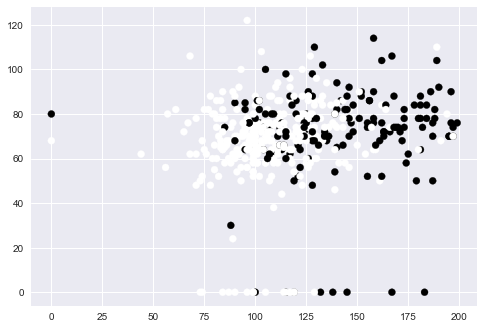

In [26]:
plt.scatter(x_train[:,1],x_train[:,2],c=y_train)
plt.show()

In [27]:
def distance(p1,p2):
    #print(type(p2))
    return np.sqrt(sum((p1-p2)**2))

In [33]:
def KNN(x,y,query,k=20):
    #print(k)
    dist_list = []
    for i in range(x.shape[0]):
        d = distance(query,x[i])
        dist_list.append((d,y[i]))
    #dist_list = np.array(dist_list)
    dist_list = sorted(dist_list)
    #print(dist_list)
    dist_list = np.array(dist_list)
    k_nearest_neighbours = dist_list[:k]
    #print(k_nearest_neighbours)
    result = np.unique(k_nearest_neighbours[:,1],return_counts=True)
    #print(result)
    index = result[1].argmax()
    pred = result[0][index]
    return pred

In [36]:
def get_accuracy(x_train,y_train,x_test,y_test):
    correct = 0
    for i in range(x_test.shape[0]):
        pred = KNN(x_train,y_train,x_test[i])
        print(str(i+1)+'\tObservation: Predicted:'+str(int(pred))+' Actual: '+str(y_test[i]))
        if y_test[i]==int(pred):
            correct += 1
    return correct/x_test.shape[0]

In [37]:
get_accuracy(x_train,y_train,x_valid,y_valid)

1	Observation: Predicted:0 Actual: 1
2	Observation: Predicted:0 Actual: 0
3	Observation: Predicted:0 Actual: 0
4	Observation: Predicted:1 Actual: 1
5	Observation: Predicted:0 Actual: 0
6	Observation: Predicted:0 Actual: 0
7	Observation: Predicted:1 Actual: 0
8	Observation: Predicted:1 Actual: 0
9	Observation: Predicted:0 Actual: 0
10	Observation: Predicted:0 Actual: 1
11	Observation: Predicted:0 Actual: 0
12	Observation: Predicted:0 Actual: 0
13	Observation: Predicted:0 Actual: 0
14	Observation: Predicted:0 Actual: 0
15	Observation: Predicted:0 Actual: 0
16	Observation: Predicted:0 Actual: 0
17	Observation: Predicted:0 Actual: 0
18	Observation: Predicted:0 Actual: 0
19	Observation: Predicted:0 Actual: 1
20	Observation: Predicted:1 Actual: 1
21	Observation: Predicted:1 Actual: 1
22	Observation: Predicted:1 Actual: 0
23	Observation: Predicted:0 Actual: 1
24	Observation: Predicted:1 Actual: 1
25	Observation: Predicted:1 Actual: 0
26	Observation: Predicted:1 Actual: 0
27	Observation: Predi

0.7241379310344828

In [38]:
def output(x,y,x_test):
    out = []
    for i in range(x_test.shape[0]):
        o = KNN(x,y,x_test[i])
        out.append(int(o))
    return out

In [39]:
result = output(x,y,x_test)

In [40]:
result

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0]